# Homework 8
## Jacob Traunero
## Problem 1

In [0]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plot
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
from tabulate import tabulate

In [0]:
def interp_monomials(xs,ys):
  vMatrix = np.zeros((len(xs),len(xs)))
  for countA, x in enumerate(xs):
    for count, _ in enumerate(xs):
      vMatrix[countA][count] = x**count
  return vMatrix, np.flip(np.linalg.solve(vMatrix,ys), axis=0)

In [0]:
def homeworkFunc(x):
  return 1/(1+25*x**2)

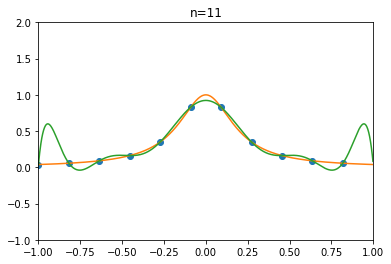

In [75]:
n = 11
n_fine = n*100 

xs_fine = [-1+2*i/n_fine for i in range(0,n_fine)]
ys_fine = [homeworkFunc(x)for x in xs_fine]

xs = [-1+2*i/n for i in range(0,n)]
ys = [homeworkFunc(x) for x in xs]

interpolated_coeff = interp_monomials(xs,ys)

interpolated_ys = np.polyval(interpolated_coeff[1], xs_fine)

plot.plot(xs, ys, 'o')
plot.plot(xs_fine, ys_fine)
plot.plot(xs_fine, interpolated_ys)
plot.axis([-1, 1, -1, 2])
plot.title("n=11")
plot.show()

## Problem 2
### Part A

In [0]:
def spline3_coeff(ts, ys):
  hs = []
  bs = []
  us = [1]
  vs = []
  for count,t in enumerate(ts):
    if count > 0:
      hs.append(t - ts[count-1])
  for count,y in enumerate(ys):
    if count < len(ys)-1:
      bs.append(1/hs[count] * (ys[count+1] - y))
  for count,h in enumerate(hs):
    if count > 0:
      us.append(2 * (h + hs[count-1]))
  us.append(1)
  for count, b in enumerate(bs):
    if count > 0:
      vs.append(6*(b - bs[count-1]))
  diagonals = [hs[0:-1] + [0],us, [0] + (hs[1:])]
  tridiag_matrix = scipy.sparse.diags(diagonals,[-1,0,1]).toarray()
  return np.linalg.solve(tridiag_matrix, [0] + vs + [0])

### Part B

In [0]:
def compute_spline(zs,ts,ys, line_xs):
  spline_ys = []
  for count,t in enumerate(ts):
    if count < len(ts)-1:
      h = ts[count + 1] - t
      gen = (x for x in line_xs if x < ts[count+1] and x >= t) 
      for x in gen:
        spline_ys.append((zs[count]/(6*h)) * (ts[count+1] - x) ** 3 + 
          ((ys[count+1]/h)-(h/6) * zs[count+1])*(x-t) +
          ((ys[count]/h)-(h/6) * zs[count])*(ts[count+1]-x))
  return spline_ys

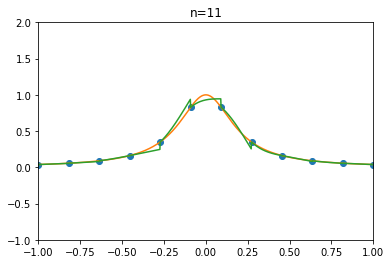

In [72]:
n = 11
n_fine = 11 * 100
ts = [-1+2*i/n for i in range(0,n+1)]
ys = [homeworkFunc(t) for t in ts]

xs_fine = [-1+2*i/n_fine for i in range(0,n_fine)]
ys_fine = [homeworkFunc(x)for x in xs_fine]

spline_ys = compute_spline(spline3_coeff(ts,ys), ts, ys, xs_fine)

plot.plot(ts, ys, 'o')
plot.plot(xs_fine, ys_fine)
plot.plot(xs_fine, spline_ys)
plot.axis([-1, 1, -1, 2])
plot.title("n=11")
plot.show()

## Problem 3
### Part A


In [0]:
# f'(x) = 2cos(x) - 2x * sin(x)
# f''(x) = -2sin(x) - (2sin(x) + 2x *cos(x)) = -4sin(x) - 2x*cos(x)
def hw_func_integrated(a,b):
  return 2*(b*np.sin(b)+np.cos(b)) - 2*(a*np.sin(a)+np.cos(a))

def hw_func(x):
  return 2*x*np.cos(x)

def f_second_deriv(x):
  return -4 * np.sin(x) - 2*x*np.cos(x)


In [70]:
def needed_n_value(max_err, func, a, b):
  max_val = (a,abs(func(a)))
  for i in np.linspace(a,b,num=10000):
    if abs(func(i)) > max_val[1]:
      max_val = (i,abs(func(i))) 
  return np.sqrt((((b-a)**3)*max_val[1])/(12*max_err))


print(
    '''
    In order for the trapezoid rule to be accurate within 10^-6, {} points
    need to be used
    '''.format(math.ceil(needed_n_value(10**-16, f_second_deriv,1,3))))


    In order for the trapezoid rule to be accurate within 10^-6, 189305309 points
    need to be used
    


### Part B

In [0]:
def comp_trap_int(f,a,b,n):
  xs = np.linspace(a,b,num=n)
  ys = []
  for count,x in enumerate(xs):
    if count > 0:
      ys.append(.5*(x-xs[count-1])*(f(x)+f(xs[count-1])))
  return sum(ys)


### Part C

In [68]:
ns = [4,8,16,32]
a=1
b=3
trap_calculations = [comp_trap_int(hw_func,a,b,n) for n in ns]
error = [abs(hw_func_integrated(1,3) - i) for i in trap_calculations]
order_of_conv = [abs((np.log(err/error[count-1])/np.log((b-a/ns[count])/(b-a)/ns\
                     [count-1]))) for count,err in enumerate(error) if count > 0]

print(tabulate(zip(ns,trap_calculations,error,[None] + order_of_conv),\
               headers=["n","Calculated Value", "Error", "Order of Convergence"]))

  n    Calculated Value        Error    Order of Convergence
---  ------------------  -----------  ----------------------
  4            -3.98153  0.0847162
  8            -3.91202  0.0152093                  1.67815
 16            -3.90011  0.00329903                 0.901622
 32            -3.89758  0.000771747                0.611006


The error does converge when n increases. However, the order of convergence is not constant which means that it does not converge polynomically. Since the order of convergence shrinks, it must be converging logarithmically.

## Problem 4

### See attached for Part A

### Part B

In [67]:
def gauss_quad_three_pts(f,a,b):
  x_0 = -np.sqrt(3/5)
  x_1 = 0
  x_2 = np.sqrt(3/5)
  w_0 = 5/9
  w_1 = 8/9
  w_2 = 5/9
  
  return (w_0 * f(((b-a)*x_0+b+a)/2) + w_1 * f(((b-a)*x_1+b+a)/2) + \
          w_2 * f(((b-a)*x_2+b+a)/2)) * ((b-a)/2)

print(gauss_quad_three_pts(hw_func,1,3))

-3.8962489818278767


Yes, the same answer was achieved.


In [0]:
def comp_gauss_quad(f,a,b,n):
  a_b_vals = np.linspace(a,b,num=n)
  sum = 0
  for count,val in enumerate(a_b_vals):
    if count>0:
      solution = gauss_quad_three_pts(f,a_b_vals[count-1],val)
      sum = sum + solution
  return sum

In [66]:
ns = [2,4,8,16,32]
a=1
b=3
gauss_calculations = [comp_gauss_quad(hw_func,a,b,n) for n in ns]
error = [abs(hw_func_integrated(1,3) - i) for i in gauss_calculations]
order_of_conv = [abs((np.log(err/error[count-1])/np.log((b-a/ns[count])/(b-a)/ns[count-1])))\
                 for count,err in enumerate(error) if count > 0]

print(tabulate(zip(ns,gauss_calculations,error,[None] + order_of_conv),\
               headers=["n","Calculated Value", "Error", "Order of Convergence"]))

  n    Calculated Value        Error    Order of Convergence
---  ------------------  -----------  ----------------------
  2            -3.89625  0.000562544
  4            -3.89681  6.43762e-07                18.0758
  8            -3.89681  3.91913e-09                 4.98487
 16            -3.89681  4.03544e-11                 2.69961
 32            -3.89681  5.18252e-13                 1.83168


Compared to the trapezoid rule, gauss quadrature error converges toward 0 much faster.